In [1]:
from sklearn.metrics import classification_report
from tensorflow.keras.datasets.mnist import load_data as load_data_MNIST

from nn.layers import *
from nn.initializers import *
from nn.activations import *
from nn.network import NeuralNetwork, MulticlassNNClassifier

## Reloading imports

In [2]:
%load_ext autoreload

In [20]:
%autoreload

## Test data

In [4]:
(x_train, y_train), (x_test, y_test) = load_data_MNIST()
x_train = (x_train / 255) - 0.5
x_test = (x_test / 255) - 0.5

data1D = np.random.random((1, 14, 1))
data2D = np.random.random((1, 7, 7, 1))

## MLP - Fully working

In [23]:
layers = [
    InputLayer((28, 28)),
    FlattenLayer(),
    DenseLayer(100, initializer=GlorotUniformInitialization()),
    BiasLayer(),
    ActivationLayer(LeakyReLuActivation(0.01)),
    DenseLayer(50, initializer=GlorotUniformInitialization()),
    BiasLayer(),
    ActivationLayer(LeakyReLuActivation(0.01)),
    DenseLayer(10, initializer=GlorotUniformInitialization()),
    BiasLayer(),
    SoftmaxLayer(),
]

model = MulticlassNNClassifier(layers)
model.summary()

InputLayer
Shape: (28, 28) -> (28, 28)
--------------------------------------------------
FlattenLayer
Shape: (28, 28) -> (784,)
--------------------------------------------------
DenseLayer
Shape: (784,) -> (100,)
--------------------------------------------------
BiasLayer
Shape: (100,) -> (100,)
--------------------------------------------------
ActivationLayer
Shape: (100,) -> (100,)
--------------------------------------------------
DenseLayer
Shape: (100,) -> (50,)
--------------------------------------------------
BiasLayer
Shape: (50,) -> (50,)
--------------------------------------------------
ActivationLayer
Shape: (50,) -> (50,)
--------------------------------------------------
DenseLayer
Shape: (50,) -> (10,)
--------------------------------------------------
BiasLayer
Shape: (10,) -> (10,)
--------------------------------------------------
SoftmaxLayer
Shape: (10,) -> (10,)
--------------------------------------------------


In [24]:
model.fit(x_train, y_train, epochs=2, learning_rate=0.01)

Epoch 2: 100%|██████████| 60000/60000 [00:56<00:00, 1058.87it/s]


In [25]:
predictions = model.predict(x_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.91      0.99      0.95      1135
           2       0.97      0.89      0.93      1032
           3       0.95      0.94      0.94      1010
           4       0.93      0.96      0.94       982
           5       0.91      0.93      0.92       892
           6       0.98      0.96      0.97       958
           7       0.97      0.91      0.94      1028
           8       0.95      0.91      0.93       974
           9       0.90      0.96      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## Activation

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
ActivationLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------


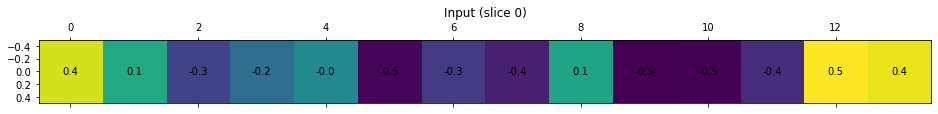

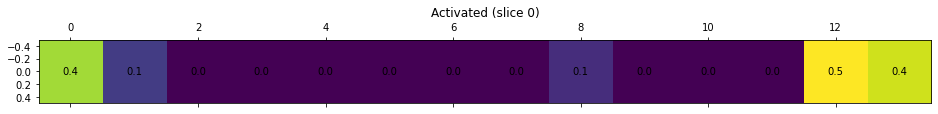

In [36]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Input'),
    ActivationLayer(ReLuActivation()),
    Log1DLayer('Activated'),
]

model = NeuralNetwork(layers)
model.summary()
predictions = model.predict(data1D-0.5)

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
ActivationLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------


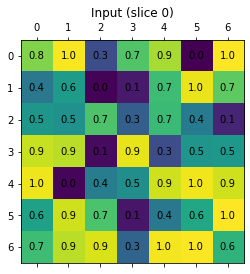

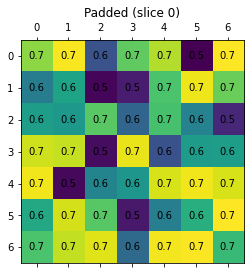

In [40]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    ActivationLayer(LogisticActivation()),
    Log2DLayer('Padded'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## Bias

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
BiasLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------


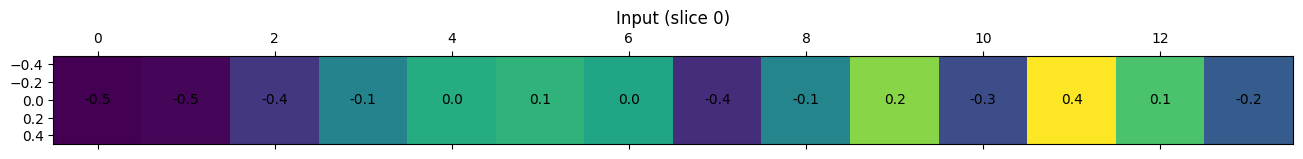

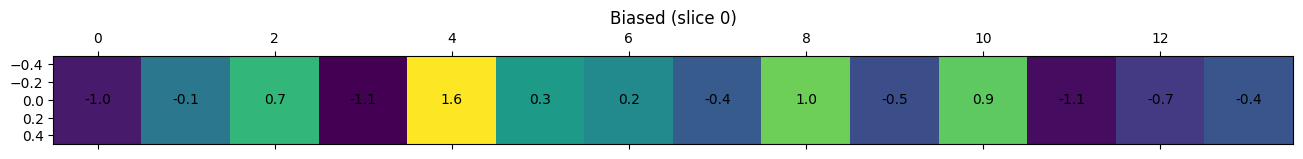

In [14]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Input'),
    BiasLayer(RandomNormalInitializer()),
    Log1DLayer('Biased'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data1D-0.5)

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
BiasLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------


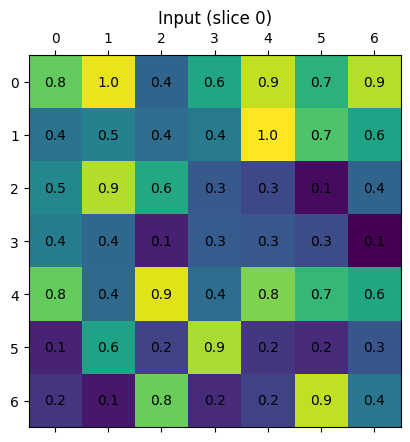

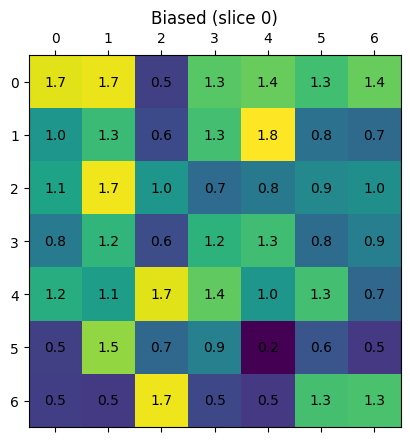

In [16]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    BiasLayer(RandomUniformInitializer()),
    Log2DLayer('Biased'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## SoftMax

InputLayer
Shape: (28, 28) -> (28, 28)
--------------------------------------------------
FlattenLayer
Shape: (28, 28) -> (784,)
--------------------------------------------------
DenseLayer
Shape: (784,) -> (10,)
--------------------------------------------------
Log1DLayer
Shape: (10,) -> (10,)
--------------------------------------------------
SoftmaxLayer
Shape: (10,) -> (10,)
--------------------------------------------------
Log1DLayer
Shape: (10,) -> (10,)
--------------------------------------------------


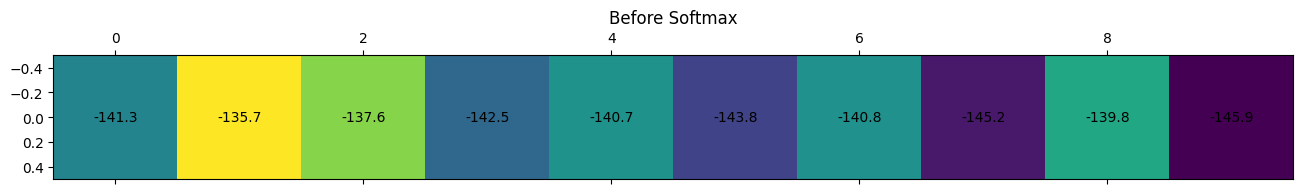

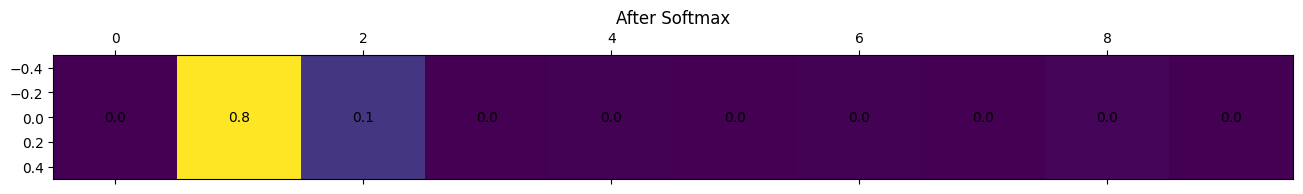

In [25]:
layers = [
    InputLayer((28, 28)),
    FlattenLayer(),
    DenseLayer(10),
    Log1DLayer('Before Softmax'),
    SoftmaxLayer(),
    Log1DLayer('After Softmax'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(x_train[0:1]);

## Padding

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Padding1DLayer
Shape: (14, 1) -> (18, 1)
--------------------------------------------------
Log1DLayer
Shape: (18, 1) -> (18, 1)
--------------------------------------------------


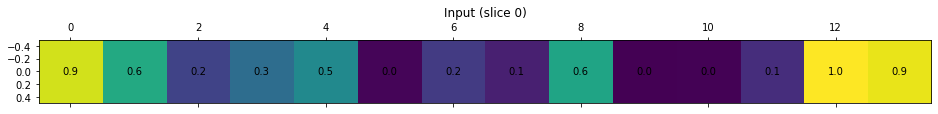

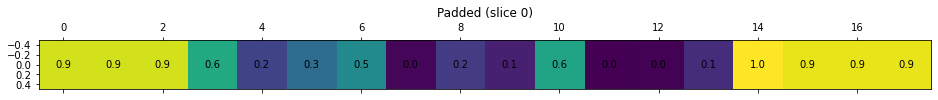

In [17]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Input'),
    Padding1DLayer('edge', 2),
    Log1DLayer('Padded'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data1D)

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Padding2DLayer
Shape: (7, 7, 1) -> (11, 11, 1)
--------------------------------------------------
Log2DLayer
Shape: (11, 11, 1) -> (11, 11, 1)
--------------------------------------------------


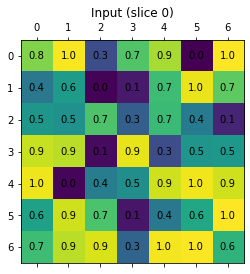

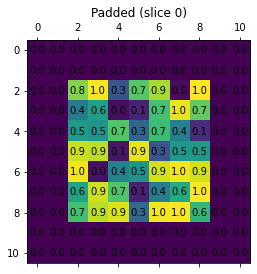

In [14]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    Padding2DLayer('zeros', (2, 2)),
    Log2DLayer('Padded'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## Convolution

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Conv1DLayer
Shape: (14, 1) -> (12, 2)
--------------------------------------------------
Log1DLayer
Shape: (12, 2) -> (12, 2)
--------------------------------------------------
BiasLayer
Shape: (12, 2) -> (12, 2)
--------------------------------------------------
Log1DLayer
Shape: (12, 2) -> (12, 2)
--------------------------------------------------


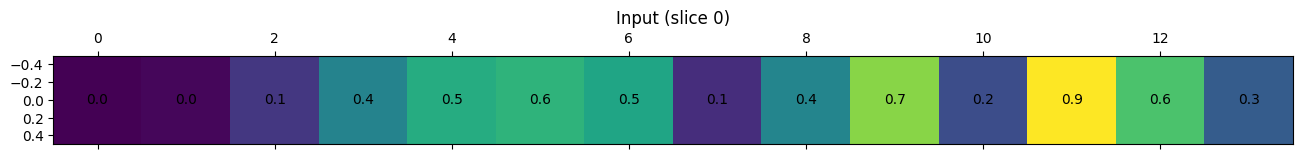

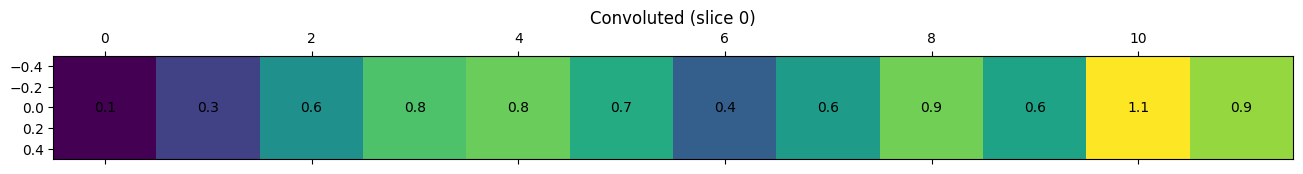

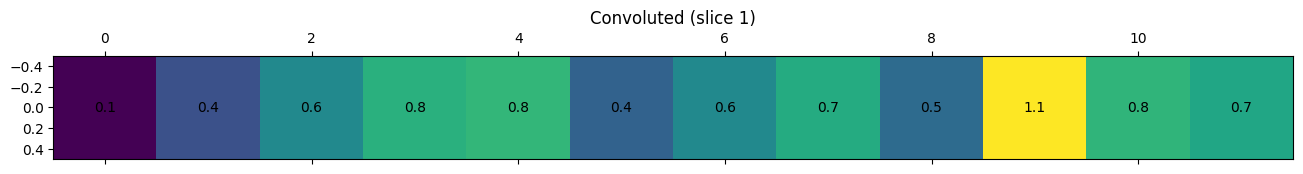

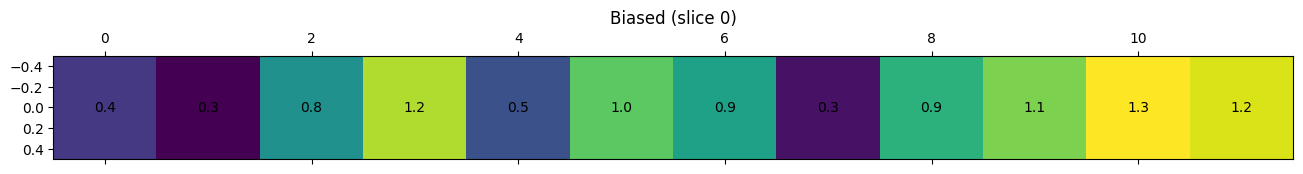

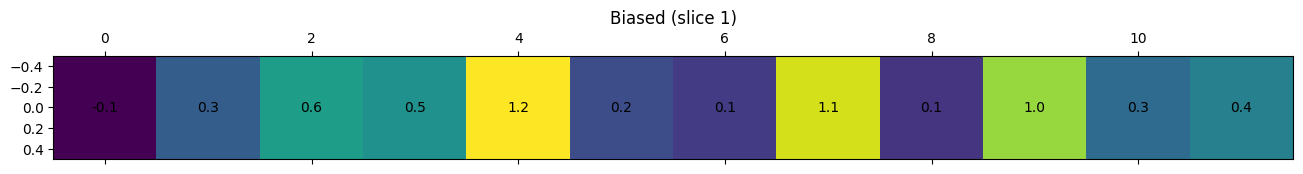

In [12]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Input'),
    Conv1DLayer(filters_count=2, kernel_size=3, stride=1, initializer=RandomUniformInitializer()),
    Log1DLayer('Convoluted'),
    BiasLayer(),
    Log1DLayer('Biased'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data1D);

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Conv2DLayer
Shape: (7, 7, 1) -> (5, 5, 2)
--------------------------------------------------
Log2DLayer
Shape: (5, 5, 2) -> (5, 5, 2)
--------------------------------------------------
BiasLayer
Shape: (5, 5, 2) -> (5, 5, 2)
--------------------------------------------------
Log2DLayer
Shape: (5, 5, 2) -> (5, 5, 2)
--------------------------------------------------


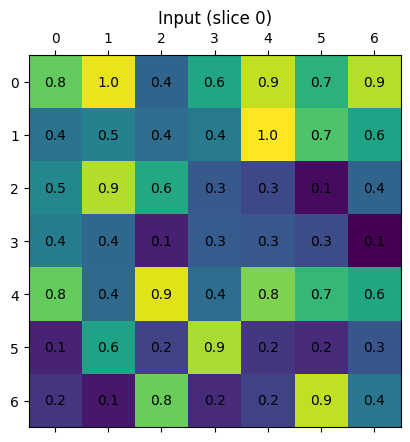

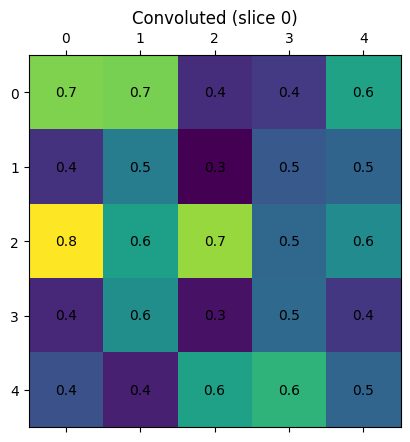

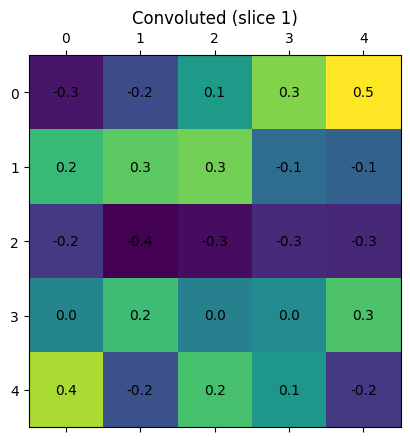

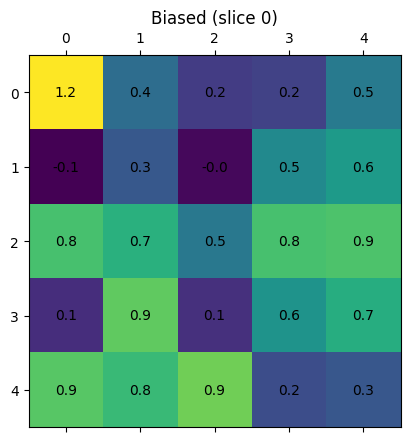

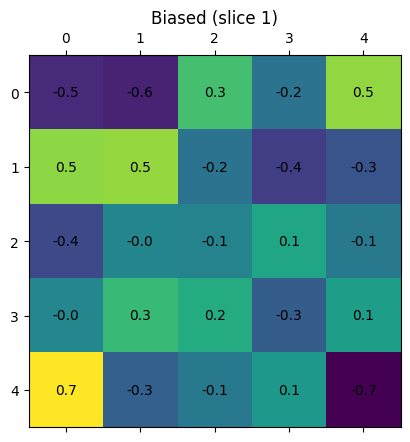

In [13]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    Conv2DLayer(filters_count=2, kernel_size=(3, 3), stride=(1, 1), initializer=GlorotUniformInitialization()),
    Log2DLayer('Convoluted'),
    BiasLayer(),
    Log2DLayer('Biased'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## Pooling

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Pool1DLayer
Shape: (14, 1) -> (7, 1)
--------------------------------------------------
Log1DLayer
Shape: (7, 1) -> (7, 1)
--------------------------------------------------


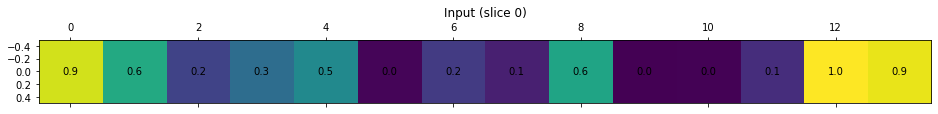

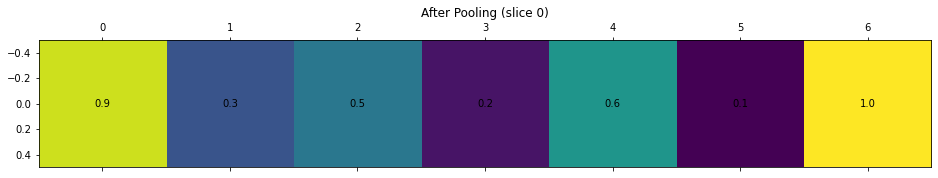

In [31]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Input'),
    Pool1DLayer(pool_size=2, stride=2, variant='max'),
    Log1DLayer('After Pooling'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data1D);

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Pool2DLayer
Shape: (7, 7, 1) -> (3, 3, 1)
--------------------------------------------------
Log2DLayer
Shape: (3, 3, 1) -> (3, 3, 1)
--------------------------------------------------


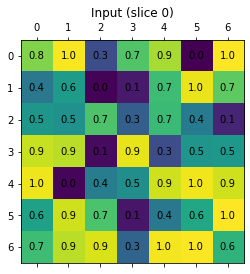

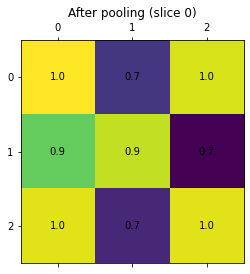

In [33]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    Pool2DLayer(pool_size=(2, 2)),
    Log2DLayer('After pooling'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## Flattening

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
FlattenLayer
Shape: (7, 7, 1) -> (49,)
--------------------------------------------------
Log1DLayer
Shape: (49,) -> (49,)
--------------------------------------------------


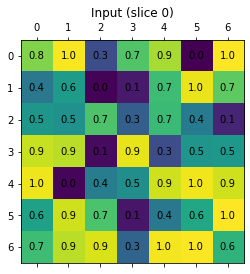

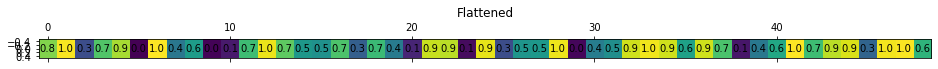

In [41]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Input'),
    FlattenLayer(),
    Log1DLayer('Flattened'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);

## Dropout

InputLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
DropoutLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------
Log1DLayer
Shape: (14, 1) -> (14, 1)
--------------------------------------------------


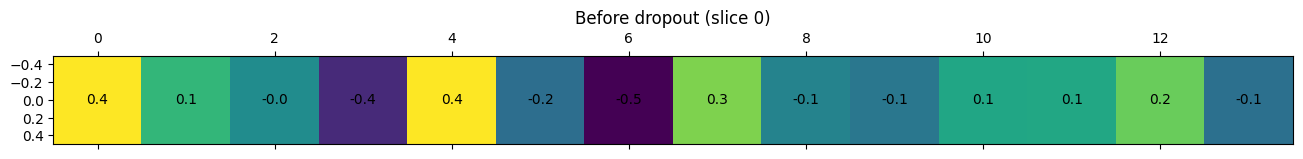

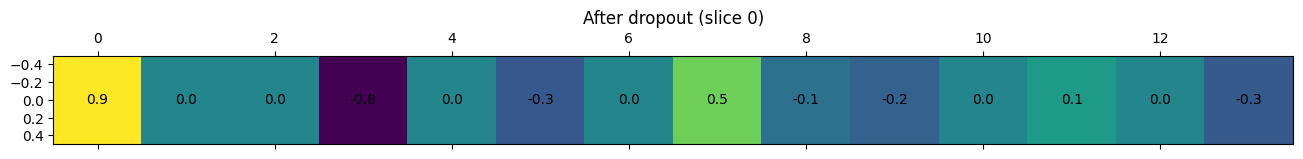

In [16]:
layers = [
    InputLayer((14, 1)),
    Log1DLayer('Before dropout'),
    DropoutLayer(0.5),
    Log1DLayer('After dropout'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data1D-0.5);

InputLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
DropoutLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------
Log2DLayer
Shape: (7, 7, 1) -> (7, 7, 1)
--------------------------------------------------


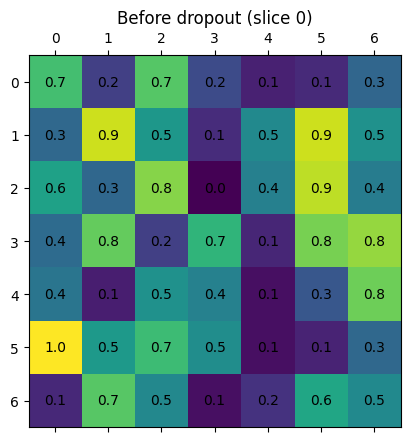

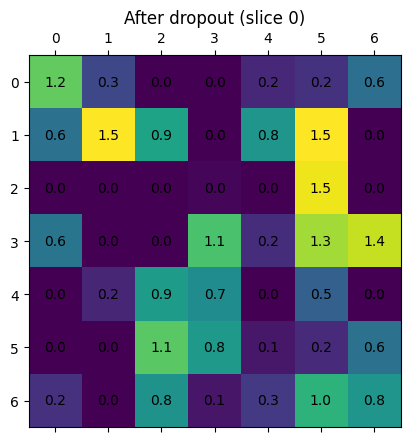

In [19]:
layers = [
    InputLayer((7, 7, 1)),
    Log2DLayer('Before dropout'),
    DropoutLayer(0.4),
    Log2DLayer('After dropout'),
]

model = NeuralNetwork(layers)
model.summary()
model.predict(data2D);